In [26]:
# Libraries
install.packages("gvlma")
library(ggplot2)
library(corrplot)
library(dplyr)
library(gvlma)


The downloaded binary packages are in
	/var/folders/m9/f2_xj5n17437mc076w7crp_c0000gn/T//RtmpCUaN4q/downloaded_packages


In [29]:
d

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovat

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
                     (Other)        :20833                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

In [4]:
# Data preprocessing
data.file$id = NULL
data.file$date = NULL

In [5]:
# Train Test Split
set.seed(123)
sample = sample(1:nrow(data.file),size=0.7*nrow(data.file))
train.data.file = data.file[sample,]
test.data.file = data.file[-sample,]
nrow(data.file)
nrow(train.data.file)
nrow(test.data.file)

[1] 21613

[1] 15129

[1] 6484

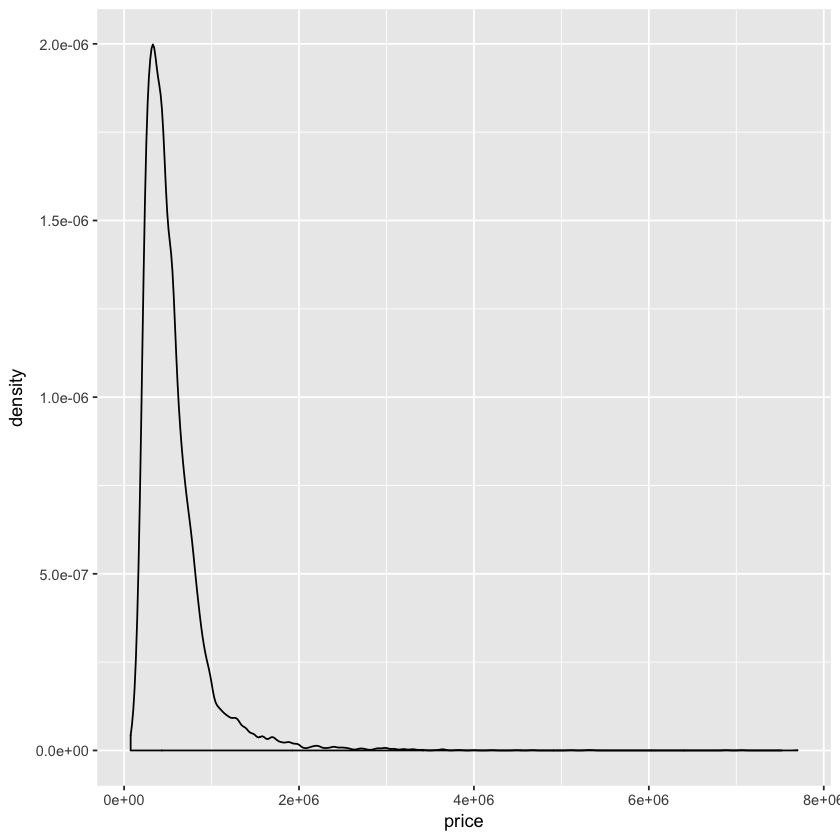

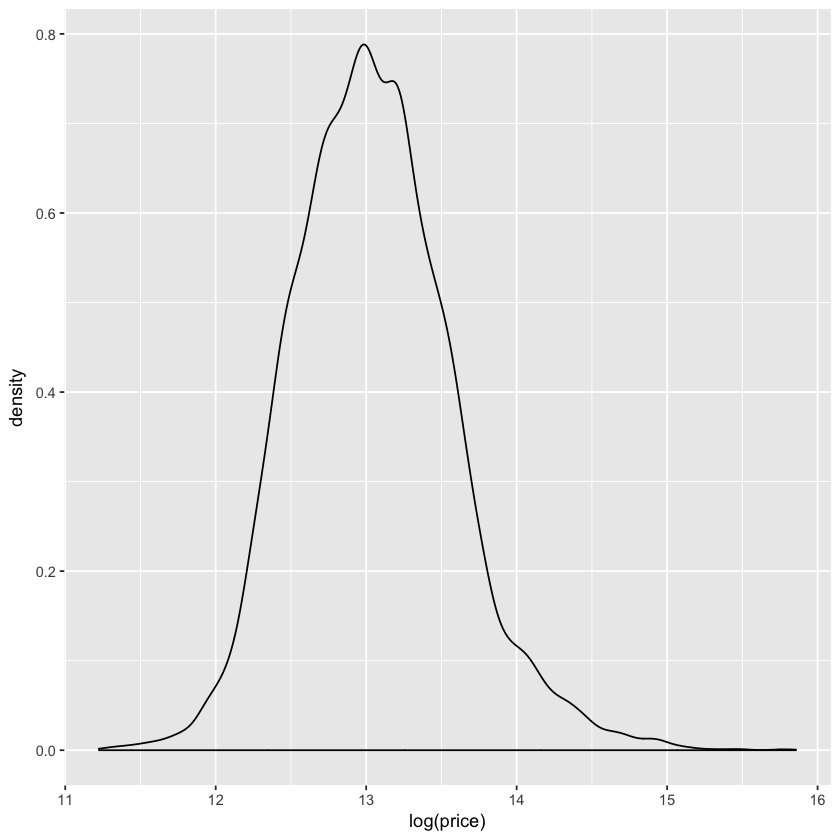

In [6]:
#Target variable normal distribution
price.ggplot = ggplot(train.data.file,aes(price)) + geom_density(kernel="gaussian") 
price.ggplot

price.log.ggplot = ggplot(train.data.file,aes(log(price))) + geom_density(kernel="gaussian")
price.log.ggplot

train.data.file$price.log = log(train.data.file$price) 


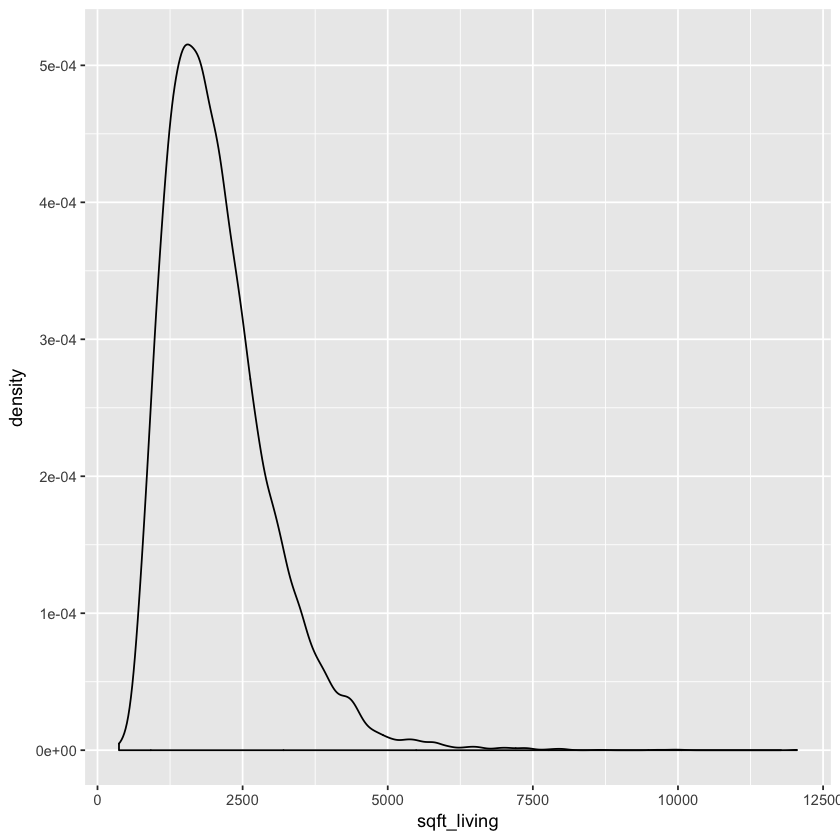

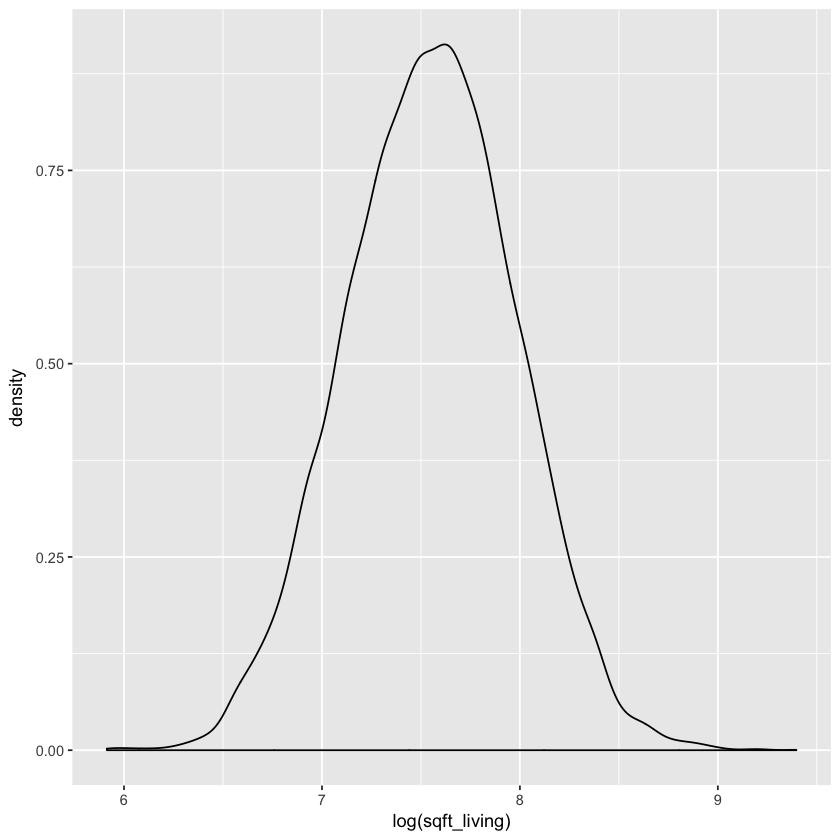

In [7]:
sqft_living.ggplot = ggplot(train.data.file,aes(sqft_living)) + geom_density(kernel="gaussian") 
sqft_living.ggplot

sqft_living.ggplot = ggplot(train.data.file,aes(log(sqft_living))) + geom_density(kernel="gaussian") 
sqft_living.ggplot

train.data.file$sqft_living.log = log(train.data.file$sqft_living) 

In [8]:
head(train.data.file)
str(train.data.file)

train.data.file$floors = as.factor(round(train.data.file$floors))
train.data.file$waterfront = as.factor(train.data.file$waterfront)
train.data.file$waterfront = as.factor(train.data.file$waterfront)
train.data.file$view = as.factor(train.data.file$view)
train.data.file$condition = as.factor(train.data.file$condition)
train.data.file$grade = as.factor(train.data.file$grade)
train.data.file$yr_built = as.factor(train.data.file$yr_built)
train.data.file$yr_renovated = as.factor(train.data.file$yr_renovated)
train.data.file$zipcode = as.factor(train.data.file$zipcode)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,⋯,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price.log,sqft_living.log
6216,364000,4,1.75,2010,8625,1,0,0,4,7,⋯,670,1957,0,98133,47.7496,-122.355,1500,8400,12.80491,7.605890
17037,875000,5,3.25,4230,21455,2,0,0,3,10,⋯,1510,1990,0,98074,47.6375,-122.015,3280,22393,13.68198,8.349957
8839,1406890,5,2.25,3580,16789,2,0,0,5,9,⋯,0,1966,0,98040,47.5364,-122.239,3390,17000,14.15689,8.183118
19083,550000,3,1.75,1410,5000,1,0,0,4,7,⋯,600,1923,0,98107,47.6727,-122.395,1760,5000,13.21767,7.251345
20323,1240000,5,4.00,4410,14380,2,0,0,3,11,⋯,0,2006,0,98052,47.6463,-122.121,2720,11454,14.03062,8.391630
985,326100,2,1.00,880,7683,1,0,0,3,6,⋯,0,1942,0,98177,47.7145,-122.361,1370,7695,12.69496,6.779922


'data.frame':	15129 obs. of  21 variables:
 $ price          : num  364000 875000 1406890 550000 1240000 ...
 $ bedrooms       : int  4 5 5 3 5 2 3 4 4 3 ...
 $ bathrooms      : num  1.75 3.25 2.25 1.75 4 1 2.5 2.5 2 1.75 ...
 $ sqft_living    : int  2010 4230 3580 1410 4410 880 2070 3440 2340 1340 ...
 $ sqft_lot       : int  8625 21455 16789 5000 14380 7683 12708 6332 6000 6250 ...
 $ floors         : num  1 2 2 1 2 1 2 2 1 1 ...
 $ waterfront     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition      : int  4 3 5 4 3 3 3 3 5 4 ...
 $ grade          : int  7 10 9 7 11 6 8 10 8 7 ...
 $ sqft_above     : int  1340 2720 3580 810 4410 880 2070 3440 1270 1090 ...
 $ sqft_basement  : int  670 1510 0 600 0 0 0 0 1070 250 ...
 $ yr_built       : int  1957 1990 1966 1923 2006 1942 1996 2001 1953 1941 ...
 $ yr_renovated   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ zipcode        : int  98133 98074 98040 98107 98052 98177 98056 98059 98199 98136 ...
 $ lat    

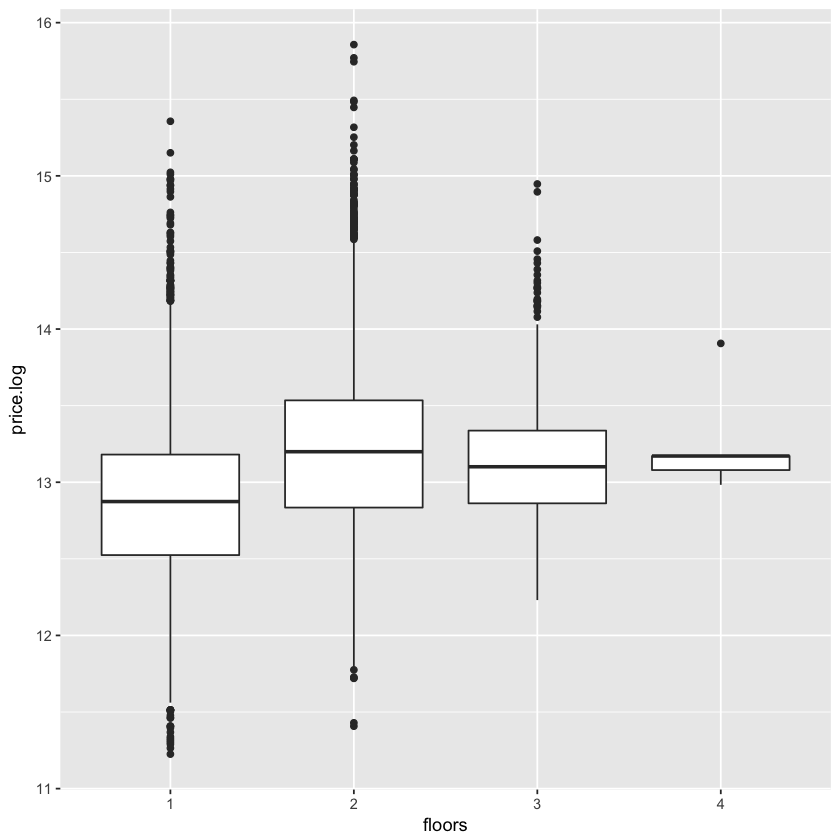

In [9]:
# Plots

floors.ggplot = ggplot(train.data.file,aes(floors,price.log))+geom_boxplot()
floors.ggplot

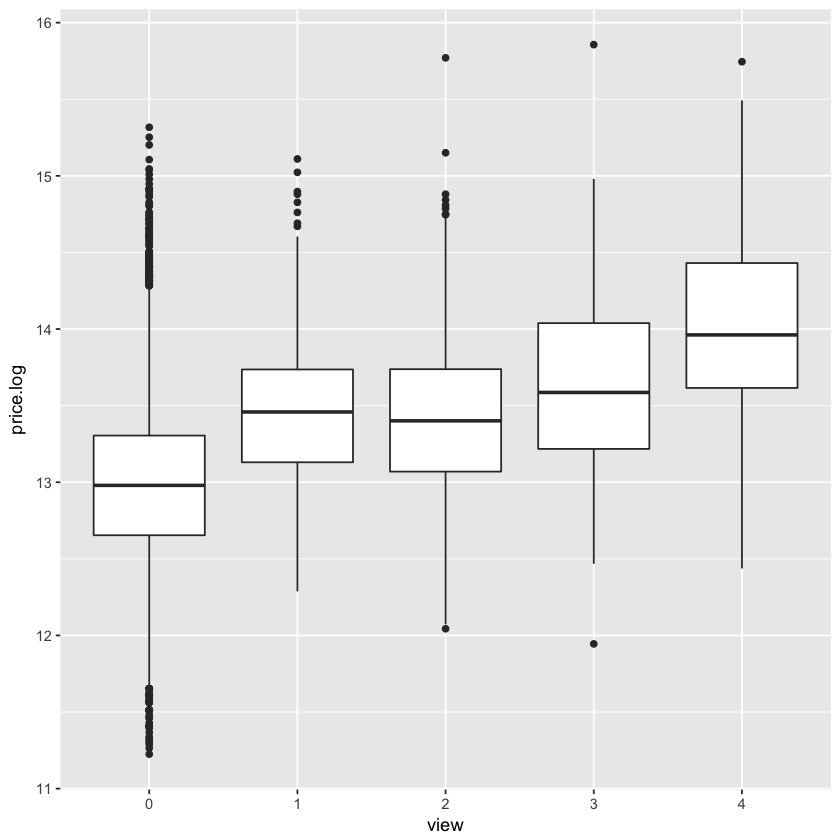

In [10]:

view.ggplot = ggplot(train.data.file,aes(view,price.log))+geom_boxplot()
view.ggplot


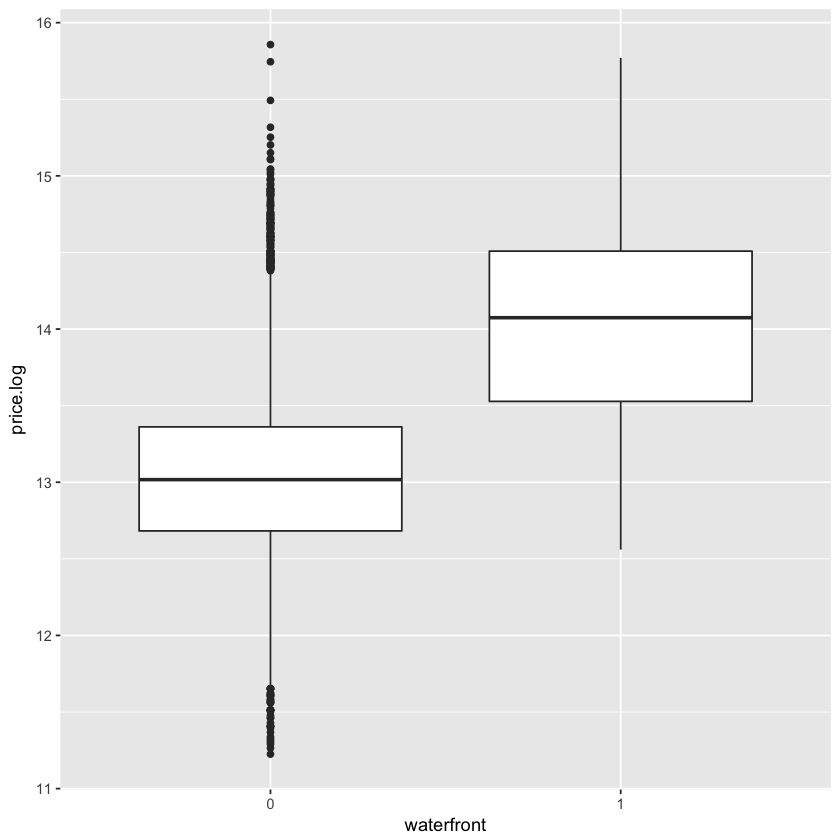

In [11]:
waterfront.ggplot = ggplot(train.data.file,aes(waterfront,price.log))+geom_boxplot()
waterfront.ggplot

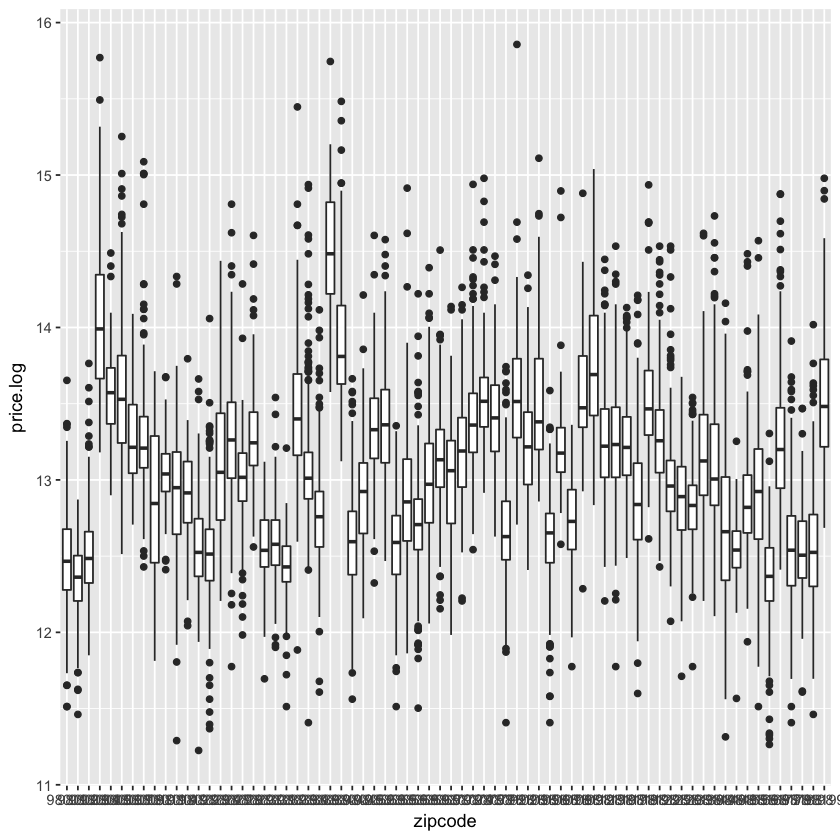

In [12]:
zipcode.ggplot = ggplot(train.data.file,aes(zipcode,price.log))+geom_boxplot()
zipcode.ggplot

[1] 0 2 1 3 4
Levels: 0 1 2 3 4

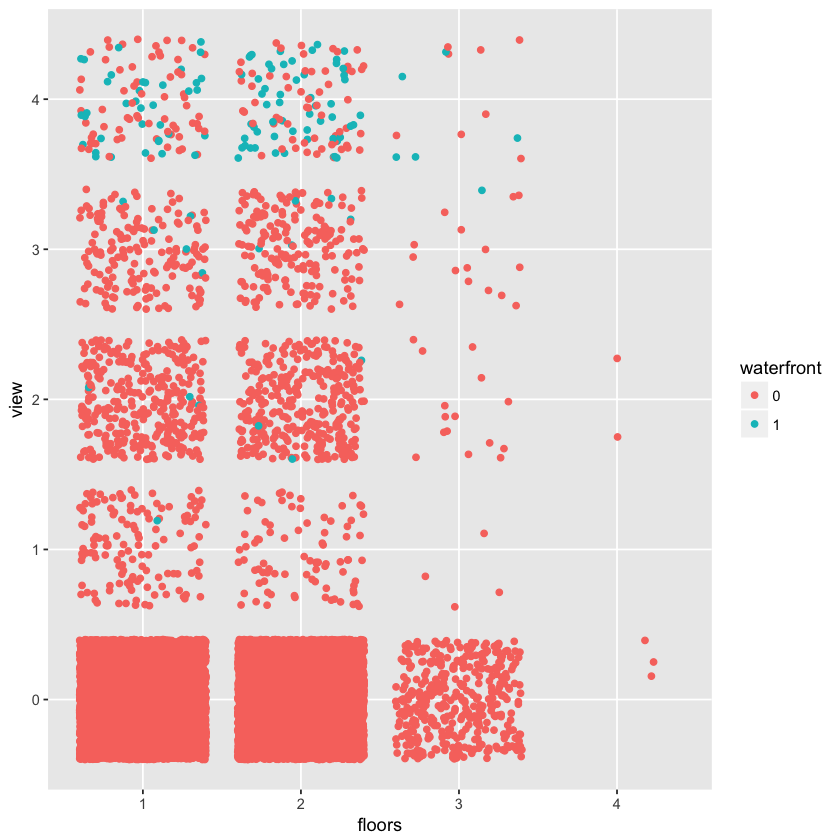

In [13]:
# ggplot(train.data.file, aes(floors, price))+geom_dotplot(binaxis = "y",stackdir = "center" , binwidth = 100, aes(fill=view, col = waterfront))

unique(train.data.file$view)
floors.view.waterfront.ggplot = ggplot(train.data.file, aes(floors, view)) + geom_jitter(aes(col=waterfront))
floors.view.waterfront.ggplot


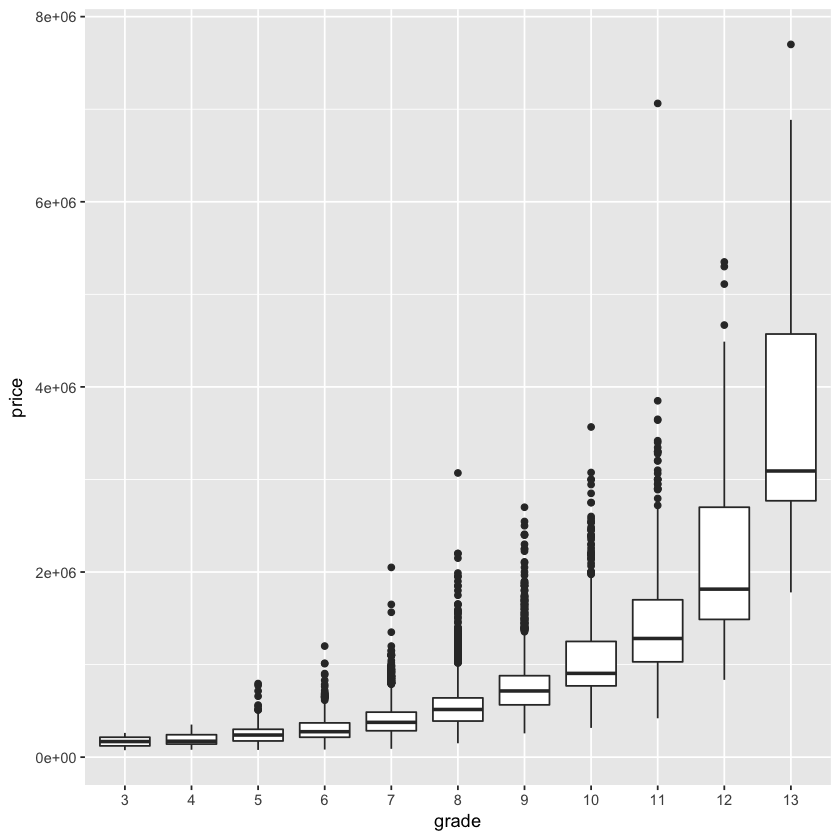

In [14]:
grade.ggplot = ggplot(train.data.file,aes(grade,price))+geom_boxplot()
grade.ggplot


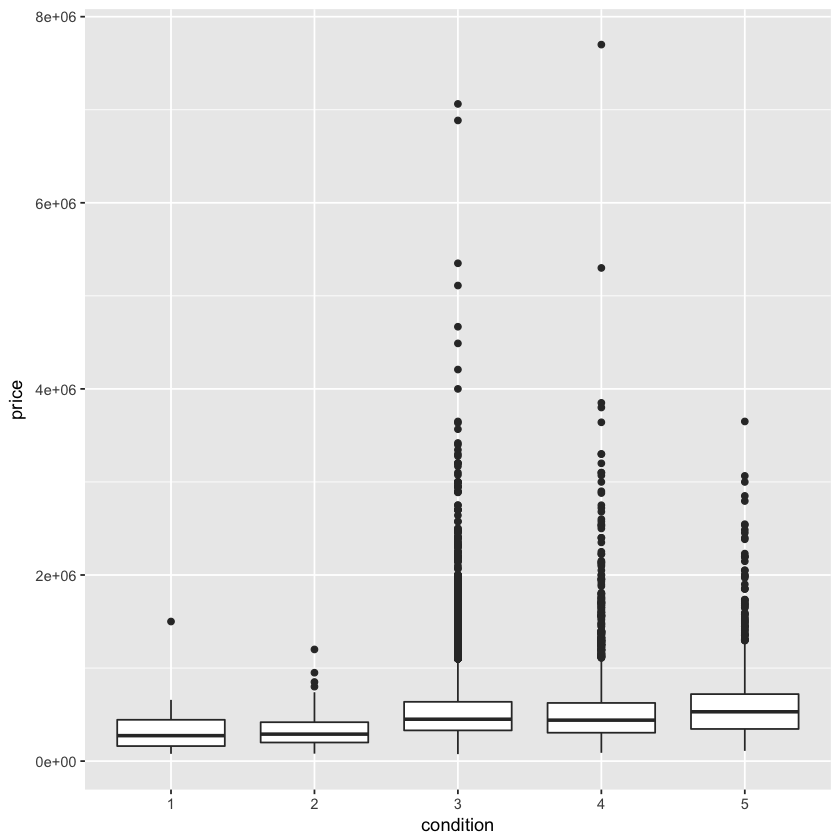

In [15]:
condition.ggplot = ggplot(train.data.file,aes(condition,price))+geom_boxplot()
condition.ggplot


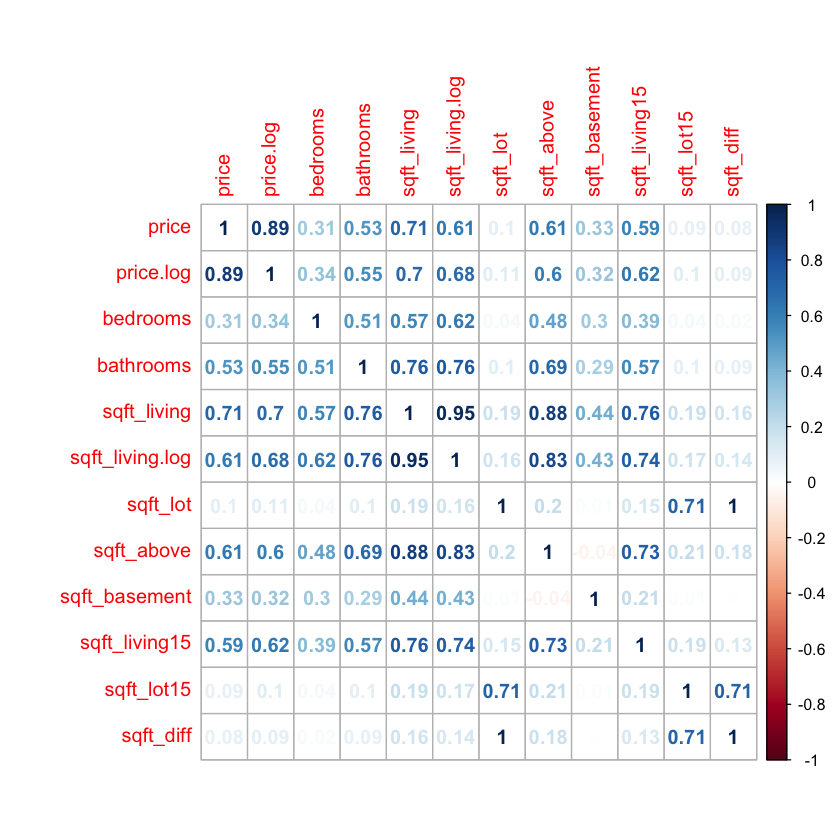

In [16]:

temp = train.data.file[,c('price','price.log','bedrooms','bathrooms','sqft_living','sqft_living.log','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15')]
temp$sqft_diff = temp$sqft_lot-temp$sqft_living
# train.data.file[,c('sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15')]
price.corplot = cor(temp)
corrplot(price.corplot, method="number")  
## Price is highly corelated to sqft_living, sqft_above and sqft_living15



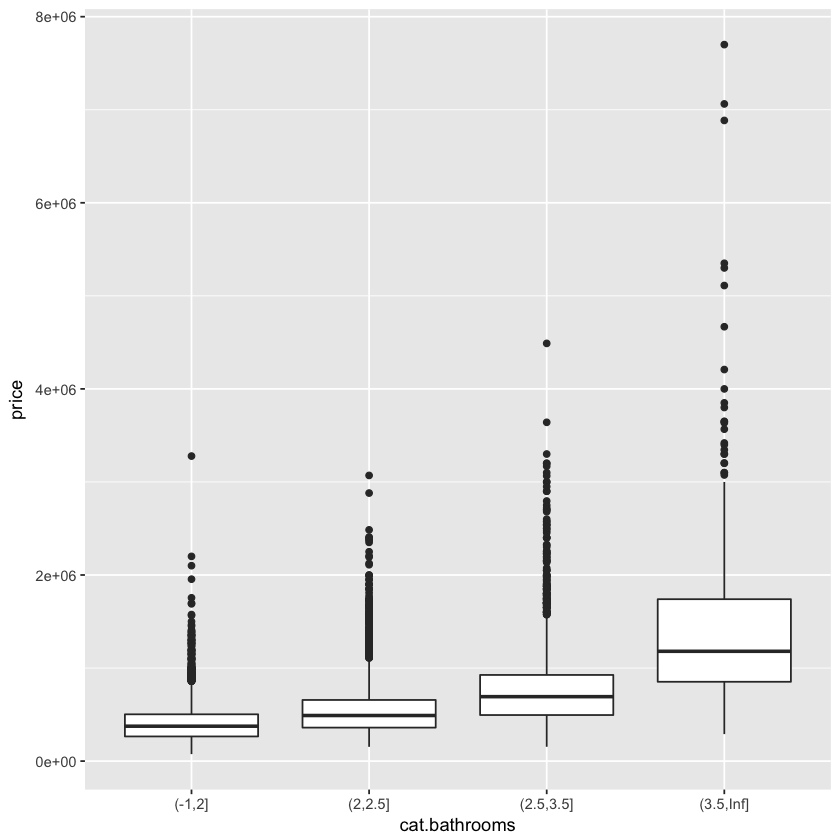

In [17]:
train.data.file$cat.bathrooms=cut(train.data.file$bathrooms, c(-1,2,2.5,3.5,Inf))

bathrooms.ggplot = ggplot(train.data.file,aes(cat.bathrooms,price))+geom_boxplot()
bathrooms.ggplot

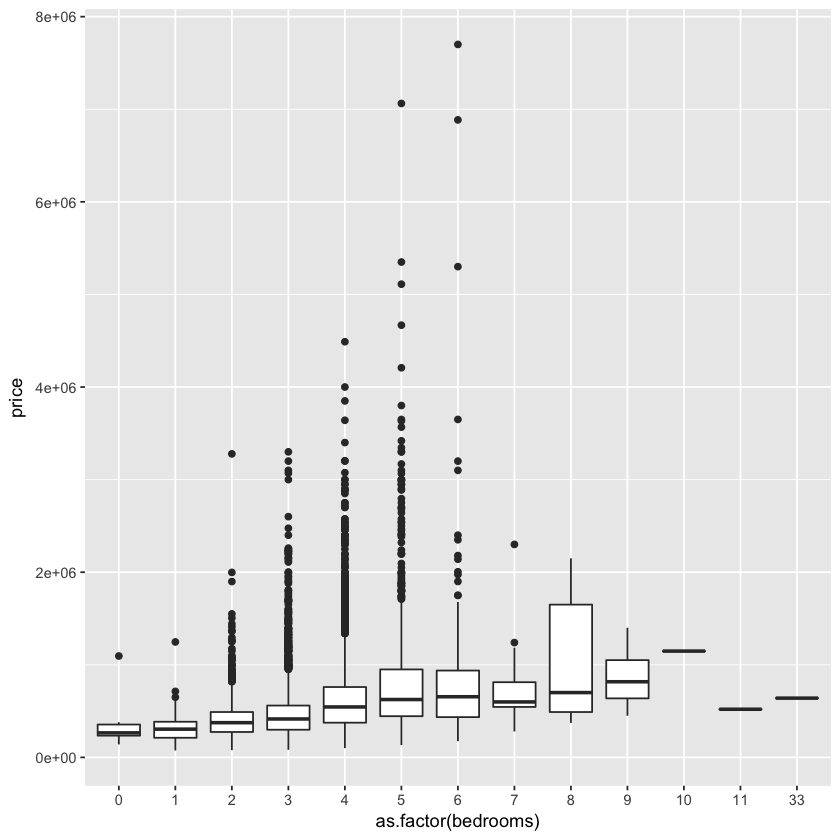

In [18]:
bedrooms.ggplot = ggplot(train.data.file,aes(as.factor(bedrooms),price))+geom_boxplot()
bedrooms.ggplot

In [19]:
lm1  = lm(price.log~sqft_living.log+bathrooms+waterfront+grade+condition,data = train.data.file)
summary(lm1)


Call:
lm(formula = price.log ~ sqft_living.log + bathrooms + waterfront + 
    grade + condition, data = train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31747 -0.24488  0.00771  0.22838  1.28923 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.1838236  0.2638794  34.803  < 2e-16 ***
sqft_living.log  0.4000384  0.0118216  33.840  < 2e-16 ***
bathrooms        0.0003859  0.0058345   0.066 0.947268    
waterfront1      0.6219761  0.0320135  19.429  < 2e-16 ***
grade4           0.3433180  0.2555289   1.344 0.179111    
grade5           0.3759582  0.2437719   1.542 0.123033    
grade6           0.4867487  0.2425243   2.007 0.044766 *  
grade7           0.6527614  0.2425297   2.691 0.007122 ** 
grade8           0.8580186  0.2426917   3.535 0.000408 ***
grade9           1.0938435  0.2429411   4.503 6.77e-06 ***
grade10          1.3223184  0.2432688   5.436 5.55e-08 ***
grade11          1.5584676  0.2440302   6.386 1.75

In [20]:
lm2 = lm(price.log~sqft_living.log+bedrooms+waterfront+grade+condition,data = train.data.file)
summary(lm2)


Call:
lm(formula = price.log ~ sqft_living.log + bedrooms + waterfront + 
    grade + condition, data = train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30417 -0.24532  0.00682  0.22885  1.26309 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.9501373  0.2634958  33.967  < 2e-16 ***
sqft_living.log  0.4399409  0.0119411  36.842  < 2e-16 ***
bedrooms        -0.0228821  0.0038604  -5.927 3.14e-09 ***
waterfront1      0.6092664  0.0320482  19.011  < 2e-16 ***
grade4           0.3540783  0.2552160   1.387 0.165350    
grade5           0.3913111  0.2434970   1.607 0.108065    
grade6           0.5002559  0.2422510   2.065 0.038937 *  
grade7           0.6654433  0.2422479   2.747 0.006022 ** 
grade8           0.8654554  0.2423898   3.571 0.000357 ***
grade9           1.0971240  0.2426379   4.522 6.18e-06 ***
grade10          1.3212387  0.2429520   5.438 5.46e-08 ***
grade11          1.5546181  0.2436861   6.380 1.83e

In [21]:
lm3 = lm(price.log~sqft_living.log+bedrooms+waterfront+grade+condition+zipcode,data = train.data.file)
summary(lm3)


Call:
lm(formula = price.log ~ sqft_living.log + bedrooms + waterfront + 
    grade + condition + zipcode, data = train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17945 -0.10856 -0.00223  0.10745  1.07899 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.105774   0.151959  53.342  < 2e-16 ***
sqft_living.log  0.536001   0.007015  76.409  < 2e-16 ***
bedrooms        -0.014894   0.002234  -6.667 2.71e-11 ***
waterfront1      0.664614   0.018792  35.368  < 2e-16 ***
grade4           0.125063   0.146356   0.855 0.392831    
grade5           0.093609   0.139656   0.670 0.502689    
grade6           0.120224   0.138936   0.865 0.386876    
grade7           0.186303   0.138946   1.341 0.179996    
grade8           0.287745   0.139037   2.070 0.038511 *  
grade9           0.442170   0.139183   3.177 0.001492 ** 
grade10          0.568994   0.139384   4.082 4.48e-05 ***
grade11          0.733127   0.139813   5.244 1.60e-07

In [28]:
# plot(lm3)
# coef(lm3)
gvlma::gvlma(lm2)
gvlma::gvlma(lm3)



Call:
lm(formula = price.log ~ sqft_living.log + bedrooms + waterfront + 
    grade + condition, data = train.data.file)

Coefficients:
    (Intercept)  sqft_living.log         bedrooms      waterfront1  
      8.9501373        0.4399409       -0.0228821        0.6092664  
         grade4           grade5           grade6           grade7  
      0.3540783        0.3913111        0.5002559        0.6654433  
         grade8           grade9          grade10          grade11  
      0.8654554        1.0971240        1.3212387        1.5546181  
        grade12          grade13       condition2       condition3  
      1.8034043        2.2787616       -0.0823356        0.0005746  
     condition4       condition5  
      0.0785320        0.2321252  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma::gvlma(x = lm2) 

                      Value   p-value                   Decision
Global Stat        21


Call:
lm(formula = price.log ~ sqft_living.log + bedrooms + waterfront + 
    grade + condition + zipcode, data = train.data.file)

Coefficients:
    (Intercept)  sqft_living.log         bedrooms      waterfront1  
        8.10577          0.53600         -0.01489          0.66461  
         grade4           grade5           grade6           grade7  
        0.12506          0.09361          0.12022          0.18630  
         grade8           grade9          grade10          grade11  
        0.28774          0.44217          0.56899          0.73313  
        grade12          grade13       condition2       condition3  
        0.90716          1.24258          0.10422          0.17505  
     condition4       condition5     zipcode98002     zipcode98003  
        0.22272          0.28772         -0.03635          0.01505  
   zipcode98004     zipcode98005     zipcode98006     zipcode98007  
        1.14009          0.72321          0.65290          0.64354  
   zipcode98008     zipco

In [23]:
anova(lm2,lm3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
15111,1769.0645,NA,NA,NA,NA
15042,571.8463,69,1197.218,456.405,0


In [ ]:
aov()